<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A1.Extracción Componentes Principales
</h1>


## Procedimiento

### Cargamos los datos de un directorio local.

In [1]:
Alumnos_usos_sociales <- read.csv("B2.332_Students.csv", comment.char="#")

### Cálculo de los componentes principales

In [2]:
# X contiene las variables que queremos trabajar
X <- Alumnos_usos_sociales[,c(31:33)]
head(X)


# Calculamos la componentes principales
Xpca<-princomp(X)

# Observamos el resultado
Xpca
summary(Xpca,loadings=T)

G1,G2,G3
0,11,11
9,11,11
12,13,12
14,14,14
11,13,13
12,12,13


Call:
princomp(x = X)

Standard deviations:
   Comp.1    Comp.2    Comp.3 
5.6158957 1.4529456 0.9728683 

 3  variables and  1044 observations.

Importance of components:
                          Comp.1     Comp.2     Comp.3
Standard deviation     5.6158957 1.45294560 0.97286827
Proportion of Variance 0.9116216 0.06102042 0.02735802
Cumulative Proportion  0.9116216 0.97264198 1.00000000

Loadings:
   Comp.1 Comp.2 Comp.3
G1 -0.485  0.808  0.335
G2 -0.567        -0.824
G3 -0.666 -0.589  0.457

### Graficamos la varianza

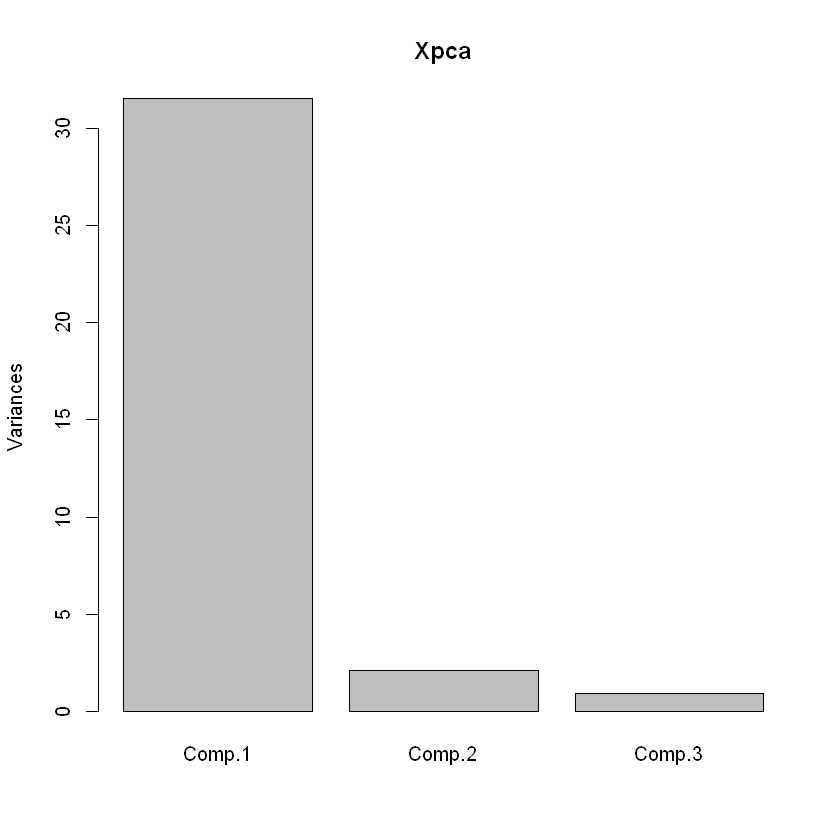

In [3]:
screeplot(Xpca)

### Revisamos scores

In [4]:
head(Xpca$scores)

Comp.1,Comp.2,Comp.3
5.802002,-8.8581402,-3.7138284
1.440158,-1.5872269,-0.6958595
-1.813841,0.2505845,-0.8800902
-4.682246,0.6894117,-0.1187202
-1.995246,-1.1466402,-0.7582065
-1.912897,-0.3405204,0.4008403


### Creamos un gráfico con dos ejes: els pca 1 y el pca. Los colores indican en verde supera la asignatura y en rojo no supera.

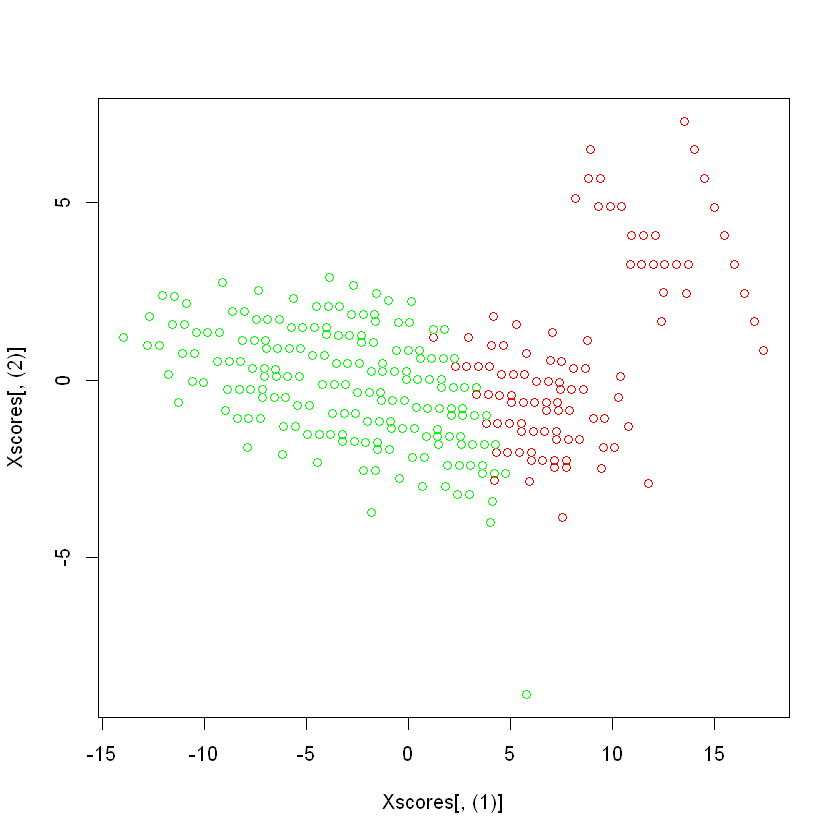

In [5]:
# Asignamos a Y si supera o no el curso
Y <- Alumnos_usos_sociales[,34]
# Dibujamos primero todos los scores de comp1 y comp2
Xscores=(Xpca$scores)
plot(Xscores[,(1)],Xscores[,(2)])
# Asignamos rojo a no supera y verde a si supera
points(Xscores[Y=="No",1],Xscores[Y=="No",2],col="red")
points(Xscores[Y=="Si",1],Xscores[Y=="Si",2],col="green")

### El mismo gráfico anterior generado a traves de ggbiplot mejorando la información

Warning message:
"package 'devtools' was built under R version 3.3.3"Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation
Warning message:
"package 'ggbiplot' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: plyr
Loading required package: scales
Loading required package: grid


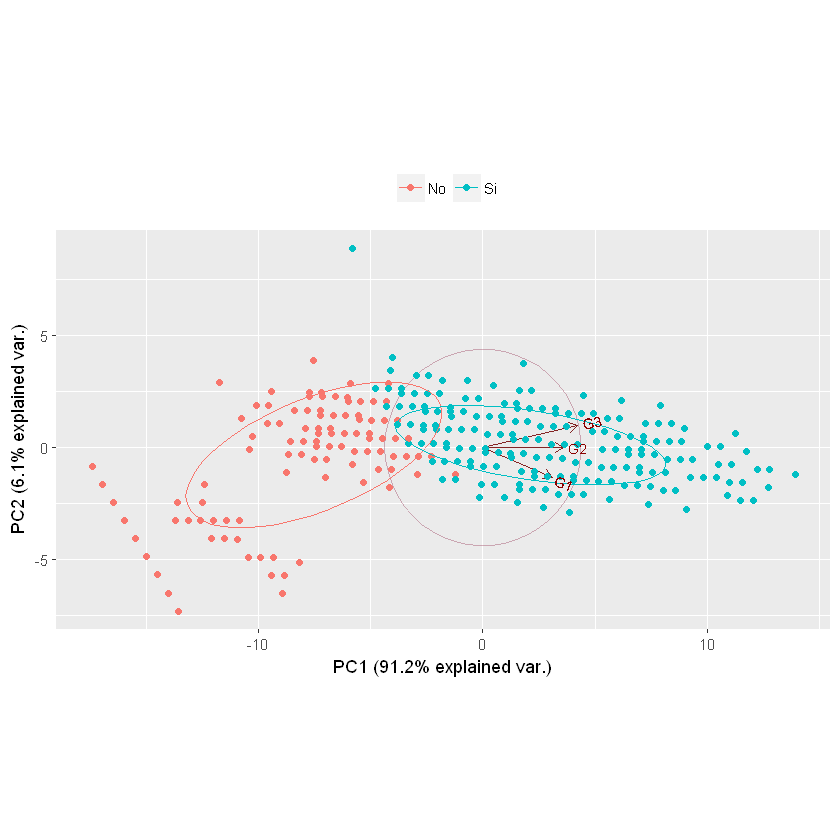

In [6]:
library(devtools)
install_github("vqv/ggbiplot",options(unzip='internal'))
library(ggbiplot)
X.pca <- prcomp(X)
ggbiplot(X.pca, obs.scale = 1, var.scale = 1,
         groups = Y, ellipse = TRUE, circle = TRUE) +
  scale_color_discrete(name = '') +
  theme(legend.direction = 'horizontal', legend.position = 'top')
